In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df.isnull().sum().sum()

866

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(labels = ["Cabin", "PassengerId", "Embarked", "Ticket"], axis=1).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [9]:
df['Age'].fillna(df['Age'].mean())
# The preprocession part is now finished.

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [10]:
df["Age"].isnull().sum()
# Simple check

177

In [11]:
df.groupby(["Sex"]).mean()
#the pourcentage of passengers that survived is much more important for Females than for Males

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [12]:
df.groupby(["Survived"]).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [13]:
df.groupby(["Pclass","Sex"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

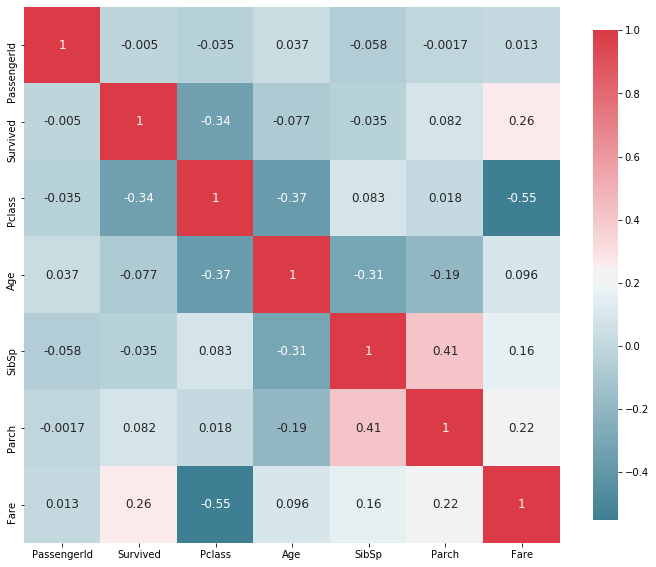

In [15]:
plot_correlation_map( df )
# Ici plus la valeur absolue de la valeur indiquée par la grille se rapproche de 1 plus il y a corrélation entre les 2 paramères reliés. Par exemple la case P/class et survived est à 0.35.Cela veut dire qu'il y a une grande relation entre la survie d'un individu et sa classe de de départ. A contrario la survie d'un individu n'a pas pour paramètre son PassengerId comme nous l'indique la case Survived/PasssengerId à 0.005

In [16]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


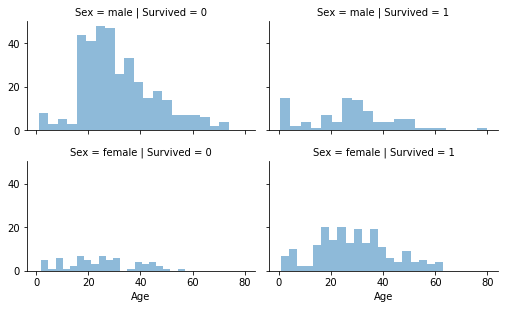

In [17]:
grid = sns.FacetGrid(df,col='Survived',
    row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5, bins=20)
grid.add_legend()

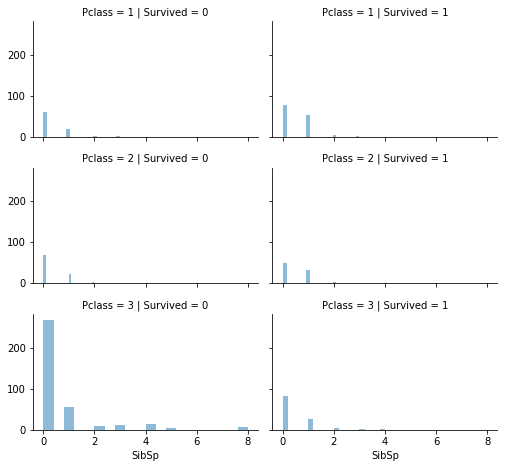

In [18]:
g = sns.FacetGrid(df,col='Survived',
    row='Pclass', height=2.2, aspect=1.6)
g.map(plt.hist,'SibSp', alpha=.5, bins=20)
g.add_legend()

In [19]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}

In [20]:
title=[]
df1=' '
for data in df['Name']:
    
    df1=data.split(',') 
    
    df1=df1[1].split('.')
    df2=df1[0].strip()
    print(df2)
    title.append(str(df2))
df['title']=title 
df.head()

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Miss
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Rev
Rev
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Rev
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
Mrs
M

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
df['title']=df['title'].map(Title_Dictionary)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mrs


In [23]:
df['title'].values

array(['Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Master',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mrs',
       'Mrs', 'Mrs', 'Miss', 'Mrs', 'Royalty', 'Mrs', 'Miss', 'Mrs',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Master',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Master',
       'Mrs', 'Miss', 'Mrs', 'Master', 'Mrs', 'Master', 'Mrs', 'Mrs',
       'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs',
       'Mrs', 'Master', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss',
       'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs',
       'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss',
       'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs',
 

In [24]:
df["title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

In [25]:
# Let's visualize the correlation between title and other features.
df.groupby(["title"]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
title,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.567568,0.702703,2.286486,21.818792,0.702703,0.540541,44.104416
Mrs,454.222395,0.281493,2.329705,33.111440,0.367030,0.284603,28.447283
Officer,545.055556,0.277778,1.444444,46.705882,0.333333,0.111111,35.786344
Royalty,554.200000,0.600000,1.000000,41.600000,0.400000,0.000000,42.150000


In [26]:
df[["title", "Survived"]].groupby(["title"], as_index = True).mean()

,Survived
title,
Master,0.575000
Miss,0.702703
Mrs,0.281493
Officer,0.277778
Royalty,0.600000


In [27]:
# We create a new unattached column. It's data consist on the addition of the value corresponding to the Parch feature and the value corresponding to the SibSp feature on each row, thanks to the lambda function below.
df.apply(lambda row: row.Parch + row.SibSp, axis = 1)
# We attach this new column to our dataframe.
df["FamilySize"] = df.apply(lambda row: row.Parch + row.SibSp, axis = 1)
# Once we have created the FamilySize column, we drop the two initial less useful columns : Parch and SibSp.
df = df.drop(columns = ["Parch", "SibSp"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,Mrs,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Mrs,0
